# Predicting Survival

## Importing the data

In [28]:
import numpy as np
import pandas as pd
import matplotlib. pyplot as plt
import sklearn
import seaborn as sns

# loading the train data
titanic_data = pd.read_csv("/content/train.csv")
titanic_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### Checking the Data

In [29]:
# getting more information from the dataset
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The data types are in order. The Age, Cabin and Embarked columns have missing values. Age would seems to be the quite an important feature ompared to the other two so something must be done. We also have to change Sex to numeric and maybe name since names carried a lot of weight back then too.


In [30]:
# getting the numerical description of the dataset
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


PassangerId, Age and Fare have a high standard deviation value meaning the data is well spred through the board. The rest are low meaning the data is more closely packed at the mean.

## Correlation

<ipython-input-31-fb3ff4b6cea7>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.show(sns.heatmap(titanic_data.corr(), cmap="RdPu"))


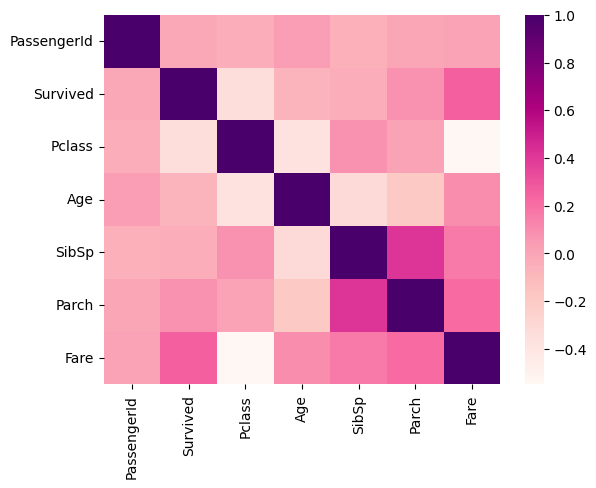

In [31]:
# checking for correlation

plt.show(sns.heatmap(titanic_data.corr(), cmap="RdPu"))

So basically, Pclass is highly negatively correlated to survival which means the lower the value of p clss the higher the probability of survival, which makes sence since Plass has 3 values, the lowest being the upper class. Same goes to Fare and Survived, which is positively correlated since the higher the fare the lower the Pclass and the higher the possibility of survival.

##Stratified Data Split
We're using a stratiffied data split technique to create a separate test data from the one provided. later on we'll merge the data and use the intended test dataset.
It shuffles athe whole dataset and picks 80% for training and 20% for testing
In order to kind of controll the randomness so we don't have a train dataset that's wildly different from the test(which can happen), we'll pick the featires that have a high importance and try to have similar distributions in the training data and testing data.

In [32]:
# Making sure our train and test data has equal distribution by feature selsction
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2) #spliting normaly
for train_indices, test_indices in split.split(titanic_data, titanic_data[["Survived","Pclass","Sex"]]):  #the split object to call the split method so the data in the specified features is equaly distributed
 strat_train_set = titanic_data.loc[train_indices]
 strat_test_set = titanic_data.loc[test_indices]


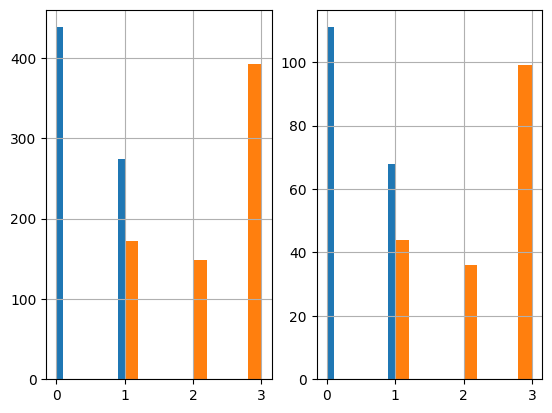

In [33]:
#checking the data distribution
plt.subplot(1,2,1)
strat_train_set["Survived"].hist()
strat_train_set["Pclass"].hist()

plt.subplot(1,2,2)
strat_test_set["Survived"].hist()
strat_test_set["Pclass"].hist()

plt.show()

The two datasets have similar distribution

In [34]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 330 to 421
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          573 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        163 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


We'll ahve to impute the missing vvalues for the Age feature.

## Estimators

In machine learning, an estimator is an equation for picking the “best”, or most likely accurate, data model based upon observations in realty. Not to be confused with estimation in general, the estimator is the formula that evaluates a given quantity (the estimand) and generates an estimate.

In [35]:
# base estimator is a class we'll use to define our fit transformer and a basic estimator
# transformermixn allows us to automatically mix fit and transform into fit_transform without having to define it explicitly
from sklearn.base import BaseEstimator, TransformerMixin
# fill the missing values, mean/random value etc
from sklearn.impute import SimpleImputer

# using a class that allowes us to create an object we call fit_transform to do imputation and all
class AgeImputer(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    return self

  def transform(self, X):
    imputer = SimpleImputer(strategy="mean")
    X["Age"] = imputer.fit_transform(X[["Age"]])
    return X


## Encoding
Let's take care of that Sex feature

In [36]:
from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder (BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    return self
  def transform(self, X):
    encoder = OneHotEncoder()
    matrix = encoder.fit_transform(X[["Embarked"]]).toarray()

    column_names = ["C","S","Q","N"]

    for i in range(len(matrix.T)):
      X[column_names[i]] = matrix.T[i]

    matrix = encoder.fit_transform(X[["Sex"]]).toarray()

    column_names = ['Female',"Male"]

    for i in range(len(matrix.T)):
      X[column_names[i]] = matrix.T[i]
    return X



We're trying to build the foundation for a pipeline. We get the dataset and what we do is, we feed it into the age imputer. This Returns the datset with the imputed ages, we feed it into the feature encoder, we get it with the encoded features and feed that into the next thing and so on.

## Dropping features
Just the unimportant ones!

In [37]:
class FeatureDropper (BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    return self

  def transform(self, X):
    return X.drop(["Embarked","Sex","Cabin","Name","Ticket","Sex","N"], axis=1, errors='ignore')

## Pipeline

In [38]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([("ageimputer", AgeImputer()),("featureencoder", FeatureEncoder()),("featuredropper", FeatureDropper())])

this pipeline should fill the missing values, encode the object dtype features into binary values and drop the unimportant features once we run the dataset by it

In [39]:
strat_train_set = pipeline.fit_transform(strat_train_set)

The above function calls the fit transform functions of all the individual components ie the estimators(ageimputer,fetureencoder and featuredropper) and then runs through all the estimators through the pipeline and what we et as a result here is our new "strat_train_set"


### Checking the Data

In [40]:
strat_train_set.head(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
330,331,1,3,29.436161,2,0,23.25,0.0,1.0,0.0,1.0,0.0
441,442,0,3,20.000000,0,0,9.50,0.0,0.0,1.0,0.0,1.0
745,746,0,1,70.000000,1,1,71.00,0.0,0.0,1.0,0.0,1.0


In [41]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 330 to 421
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   C            712 non-null    float64
 8   S            712 non-null    float64
 9   Q            712 non-null    float64
 10  Female       712 non-null    float64
 11  Male         712 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 72.3 KB


We don't have any null values anymore and the sex and embarked features have been encoded into the unique value columns so they're now in binary. We're now going to use the data that we got from the pipeline and scale it then start with the actual training

## Scalling
Feature scaling is a data preprocessing technique used to transform the values of features or variables in a dataset to a similar scale.

Machine learning scaling is part of data preparation as this technique **brings data points that are far from each other closer in order to increase the algorithm effectiveness and speed up the Machine Learning processing**. Scaling data enables the model to learn and actually understand the problem.

In [42]:
from sklearn.preprocessing import StandardScaler

X = strat_train_set.drop(["Survived"], axis=1)
y = strat_train_set["Survived"]

scaler = StandardScaler()
X_data = scaler.fit_transform(X) #returns a numpy array
y_data = y.to_numpy()

### Checking the Data

In [43]:
X_data

array([[-4.26947663e-01,  8.27893418e-01, -5.49124200e-16, ...,
        -1.64570147e+00,  1.35941164e+00, -1.35941164e+00],
       [ 3.81534193e-03,  8.27893418e-01, -7.29248764e-01, ...,
         6.07643620e-01, -7.35612358e-01,  7.35612358e-01],
       [ 1.18356267e+00, -1.56828591e+00,  3.13486927e+00, ...,
         6.07643620e-01, -7.35612358e-01,  7.35612358e-01],
       ...,
       [ 1.52506848e+00,  8.27893418e-01, -4.97401682e-01, ...,
         6.07643620e-01, -7.35612358e-01,  7.35612358e-01],
       [-4.46351402e-01, -1.56828591e+00,  5.07269008e-01, ...,
        -1.64570147e+00,  1.35941164e+00, -1.35941164e+00],
       [-7.37996139e-02,  8.27893418e-01, -6.51966404e-01, ...,
        -1.64570147e+00, -7.35612358e-01,  7.35612358e-01]])

We have our data in the format that we want now we have to train the model, evaluate this model until we're confident, then we need to train the model again on the full data then submit the predictions as a csv file

## Model Selection

Models in concideration:
* K-nearest neighbor's classification
* Support Vetor Classification
* Random Forest Classifier

I'm using a random forest classifier because based on the strat_train_set.info() results, the decision structure can be modeled as a decision tree and a random forest classifier is basically a clusiffier that uses multiple decision trees to make a decision


In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# defining the classifier
clf = RandomForestClassifier()

# list of dictionaries(parameters we can pass for the randomforestclassifier). look up the documentation of RFC for more
param_grid = [
    {"n_estimators": [10,100,200,500,1000,1100], "max_depth": [None, 5, 10], "min_samples_split": [2,3,4]}
]

grid_search = GridSearchCV(clf, param_grid, cv=3, scoring="accuracy",return_train_score=True)
grid_search.fit(X_data, y_data)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500, 1000, 1100]}],
             return_train_score=True, scoring='accuracy')

the gridsearchCV is basically cross validation.

So you have 100% of your data and you split it into 10 folds for example and what you do is take 9 of those folds, train them on all those 9 and test/evaluate it on the 1 fold that's remaining then redo withall possible combinations to have trained all its  variations. Each of the folds would be used once in validation.

 It does this to find the optimal hyper parameters. Hyper parameters for example in KNN, you can specify how many neighbours to look at. GridSearch uses cross validation with the different combinations of these hyperparameters, to get the opimal hyperparameters.

In [45]:
# getting the best estimator that was found
final_clf = grid_search.best_estimator_
final_clf

RandomForestClassifier(min_samples_split=4, n_estimators=1000)

## Scoring

In [46]:
strat_test_set = pipeline.fit_transform(strat_test_set)


In [47]:
strat_test_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
487,488,0,1,58.00000,0,0,29.7000,1.0,0.0,0.0,0.0,1.0
705,706,0,2,39.00000,0,0,26.0000,0.0,0.0,1.0,0.0,1.0
105,106,0,3,28.00000,0,0,7.8958,0.0,0.0,1.0,0.0,1.0
644,645,1,3,0.75000,2,1,19.2583,1.0,0.0,0.0,1.0,0.0
611,612,0,3,30.76773,0,0,7.0500,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
142,143,1,3,24.00000,1,0,15.8500,0.0,0.0,1.0,1.0,0.0
696,697,0,3,44.00000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
211,212,1,2,35.00000,0,0,21.0000,0.0,0.0,1.0,1.0,0.0
54,55,0,1,65.00000,0,1,61.9792,1.0,0.0,0.0,0.0,1.0


In [48]:
X_test = strat_test_set.drop(["Survived"],axis=1)
y_test = strat_test_set["Survived"]

scaler = StandardScaler()
X_dataset = scaler.fit_transform(X_test)
y_data_test = y_test.to_numpy()

In [50]:
final_clf.score(X_dataset, y_data_test)

0.8156424581005587

## Using the combined data to train and get predictions now

In [51]:
final_data = pipeline.fit_transform(titanic_data)
final_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
0,1,0,3,22.000000,1,0,7.2500,0.0,0.0,1.0,0.0,1.0
1,2,1,1,38.000000,1,0,71.2833,1.0,0.0,0.0,1.0,0.0
2,3,1,3,26.000000,0,0,7.9250,0.0,0.0,1.0,1.0,0.0
3,4,1,1,35.000000,1,0,53.1000,0.0,0.0,1.0,1.0,0.0
4,5,0,3,35.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
887,888,1,1,19.000000,0,0,30.0000,0.0,0.0,1.0,1.0,0.0
888,889,0,3,29.699118,1,2,23.4500,0.0,0.0,1.0,1.0,0.0
889,890,1,1,26.000000,0,0,30.0000,1.0,0.0,0.0,0.0,1.0


In [52]:
X_final = final_data.drop(["Survived"],axis=1)
y_final = final_data["Survived"]

scaler = StandardScaler()
X_data_final = scaler.fit_transform(X_final)
y_data_final = y_final.to_numpy()

In [53]:
prod_clf = RandomForestClassifier()

# list of dictionaries(parameters we can pass for the randomforestclassifier). look up the documentation of RFC for more
param_grid = [
    {"n_estimators": [10,100,200,500,1000,1100], "max_depth": [None, 5, 10], "min_samples_split": [2,3,4]}
]

grid_search = GridSearchCV(prod_clf, param_grid, cv=3, scoring="accuracy",return_train_score=True)
grid_search.fit(X_data_final, y_data_final)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500, 1000, 1100]}],
             return_train_score=True, scoring='accuracy')

In [54]:
prod_final_clf = grid_search.best_estimator_
prod_final_clf

RandomForestClassifier(max_depth=5, n_estimators=500)

In [55]:
titanic_test_data = pd.read_csv("/content/test.csv")

In [56]:
final_test_data = pipeline.fit_transform(titanic_test_data)

In [57]:
final_test_data

,PassengerId,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
0,892,3,34.50000,0,0,7.8292,0.0,1.0,0.0,0.0,1.0
1,893,3,47.00000,1,0,7.0000,0.0,0.0,1.0,1.0,0.0
2,894,2,62.00000,0,0,9.6875,0.0,1.0,0.0,0.0,1.0
3,895,3,27.00000,0,0,8.6625,0.0,0.0,1.0,0.0,1.0
4,896,3,22.00000,1,1,12.2875,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,30.27259,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
414,1306,1,39.00000,0,0,108.9000,1.0,0.0,0.0,1.0,0.0
415,1307,3,38.50000,0,0,7.2500,0.0,0.0,1.0,0.0,1.0
416,1308,3,30.27259,0,0,8.0500,0.0,0.0,1.0,0.0,1.0


In [58]:
# filling null
X_final_test = final_test_data
X_final_test = X_final_test.fillna(method="ffill")

scaler = StandardScaler()
X_data_final_test = scaler.fit_transform(X_final_test)

In [59]:
# this'll give you an array
predictions = prod_final_clf.predict(X_data_final_test)

In [61]:
final_df = pd.DataFrame(titanic_test_data["PassengerId"])
final_df["Survived"] = predictions


In [63]:
final_df.to_csv("/content/predictions.csv", index=False)

In [64]:
final_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
